# ``2m TEMPERATURE (t2m)``

    hora  Média de Temperatura (°C)
0      6                  26.103784
1      7                  26.558773
2      8                  26.789144
3      9                  27.297849
4     10                  27.674909
5     11                  32.526002
6     12                  32.838252
7     13                  33.035457
8     14                  32.995584
9     15                  33.059527
10    16                  32.854078
11    17                  30.141608
12    18                  27.720889


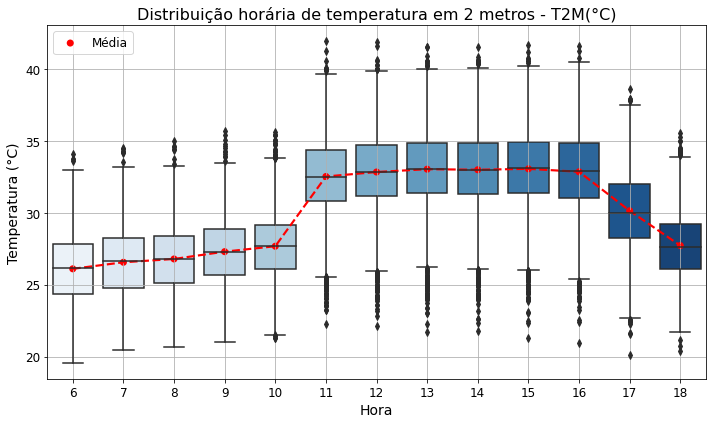

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregue o arquivo .xlsx
file_path = 'C:/Winpython/WPy64-39100/notebooks/Dissertacao/defesa/INMET_ERA5/2_INMET_ERA5_ATUALIZADO_processo/BA/A418_H_BOM_JESUS_DA_LAPA_BA_TESTE.xlsx'

coluna_dados = 'T2M(°C)'  # Substitua 'nome_da_coluna' pelo nome da coluna com os dados
df = pd.read_excel(file_path)

# Certifique-se de que a coluna contendo as datas esteja no formato datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Passo 2: Criar um novo campo de hora
df['hora'] = df['Timestamp'].dt.hour

# Filtrar apenas as horas de 6 a 18
df = df[(df['hora'] >= 6) & (df['hora'] <= 18)]

# Calcular as médias por hora
df_media_por_hora = df.groupby('hora')[coluna_dados].mean().reset_index()

# Exibir os valores das médias em um DataFrame
df_medias = df_media_por_hora.rename(columns={coluna_dados: 'Média de Temperatura (°C)'})
print(df_medias)

# Passo 3: Plotar o violinplot com a distribuição por hora
plt.figure(figsize=(10, 6))  # Ajuste o tamanho da figura
sns.boxplot(data=df, x='hora', y=coluna_dados, palette='Blues')
plt.title('Distribuição horária de temperatura em 2 metros - ' + coluna_dados, fontsize=16)  # Aumentar o tamanho da fonte do título

# Passo 4: Plotar o ponto médio de cada hora com um pontoplot
sns.pointplot(data=df_media_por_hora, x='hora', y=coluna_dados, color='red', markers='o', linestyles='--', label='Média', scale=0.8)
plt.legend(loc='upper left', fontsize=12)  # Aumentar o tamanho da fonte da legenda da média

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel('Hora', fontsize=14)  # Aumentar o tamanho da fonte do texto do eixo x
plt.ylabel('Temperatura (°C)', fontsize=14)  # Aumentar o tamanho da fonte do texto do eixo y

plt.tight_layout()
plt.grid(True)
plt.show()
